In [3]:
import collections
user_dic = collections.defaultdict(int)
song_dic = collections.defaultdict(int)
edge_list = []
with open('data/train_triplets.txt', 'r') as f:
    for idx, line in enumerate(f.readlines()):
        if idx % 100000 == 0:
            print('idx:', idx)
        line = line.strip()
        fields = line.split('\t')
        user, song, weight = fields[0], fields[1], int(fields[2])
        user_dic[user] += 1
        song_dic[song] += 1
        edge_list.append((user, song, weight))
        line = f.readline()


idx: 0
idx: 10000
idx: 20000
idx: 30000
idx: 40000
idx: 50000
idx: 60000
idx: 70000
idx: 80000
idx: 90000
idx: 100000
idx: 110000
idx: 120000
idx: 130000
idx: 140000
idx: 150000
idx: 160000
idx: 170000
idx: 180000
idx: 190000
idx: 200000
idx: 210000
idx: 220000
idx: 230000
idx: 240000
idx: 250000
idx: 260000
idx: 270000
idx: 280000
idx: 290000
idx: 300000
idx: 310000
idx: 320000
idx: 330000
idx: 340000
idx: 350000
idx: 360000
idx: 370000
idx: 380000
idx: 390000
idx: 400000
idx: 410000
idx: 420000
idx: 430000
idx: 440000
idx: 450000
idx: 460000
idx: 470000
idx: 480000
idx: 490000
idx: 500000
idx: 510000
idx: 520000
idx: 530000
idx: 540000
idx: 550000
idx: 560000
idx: 570000
idx: 580000
idx: 590000
idx: 600000
idx: 610000
idx: 620000
idx: 630000
idx: 640000
idx: 650000
idx: 660000
idx: 670000
idx: 680000
idx: 690000
idx: 700000
idx: 710000
idx: 720000
idx: 730000
idx: 740000
idx: 750000
idx: 760000
idx: 770000
idx: 780000
idx: 790000
idx: 800000
idx: 810000
idx: 820000
idx: 830000
idx: 8

idx: 6400000
idx: 6410000
idx: 6420000
idx: 6430000
idx: 6440000
idx: 6450000
idx: 6460000
idx: 6470000
idx: 6480000
idx: 6490000
idx: 6500000
idx: 6510000
idx: 6520000
idx: 6530000
idx: 6540000
idx: 6550000
idx: 6560000
idx: 6570000
idx: 6580000
idx: 6590000
idx: 6600000
idx: 6610000
idx: 6620000
idx: 6630000
idx: 6640000
idx: 6650000
idx: 6660000
idx: 6670000
idx: 6680000
idx: 6690000
idx: 6700000
idx: 6710000
idx: 6720000
idx: 6730000
idx: 6740000
idx: 6750000
idx: 6760000
idx: 6770000
idx: 6780000
idx: 6790000
idx: 6800000
idx: 6810000
idx: 6820000
idx: 6830000
idx: 6840000
idx: 6850000
idx: 6860000
idx: 6870000
idx: 6880000
idx: 6890000
idx: 6900000
idx: 6910000
idx: 6920000
idx: 6930000
idx: 6940000
idx: 6950000
idx: 6960000
idx: 6970000
idx: 6980000
idx: 6990000
idx: 7000000
idx: 7010000
idx: 7020000
idx: 7030000
idx: 7040000
idx: 7050000
idx: 7060000
idx: 7070000
idx: 7080000
idx: 7090000
idx: 7100000
idx: 7110000
idx: 7120000
idx: 7130000
idx: 7140000
idx: 7150000
idx: 7160000

idx: 12520000
idx: 12530000
idx: 12540000
idx: 12550000
idx: 12560000
idx: 12570000
idx: 12580000
idx: 12590000
idx: 12600000
idx: 12610000
idx: 12620000
idx: 12630000
idx: 12640000
idx: 12650000
idx: 12660000
idx: 12670000
idx: 12680000
idx: 12690000
idx: 12700000
idx: 12710000
idx: 12720000
idx: 12730000
idx: 12740000
idx: 12750000
idx: 12760000
idx: 12770000
idx: 12780000
idx: 12790000
idx: 12800000
idx: 12810000
idx: 12820000
idx: 12830000
idx: 12840000
idx: 12850000
idx: 12860000
idx: 12870000
idx: 12880000
idx: 12890000
idx: 12900000
idx: 12910000
idx: 12920000
idx: 12930000
idx: 12940000
idx: 12950000
idx: 12960000
idx: 12970000
idx: 12980000
idx: 12990000
idx: 13000000
idx: 13010000
idx: 13020000
idx: 13030000
idx: 13040000
idx: 13050000
idx: 13060000
idx: 13070000
idx: 13080000
idx: 13090000
idx: 13100000
idx: 13110000
idx: 13120000
idx: 13130000
idx: 13140000
idx: 13150000
idx: 13160000
idx: 13170000
idx: 13180000
idx: 13190000
idx: 13200000
idx: 13210000
idx: 13220000
idx: 1

idx: 18380000
idx: 18390000
idx: 18400000
idx: 18410000
idx: 18420000
idx: 18430000
idx: 18440000
idx: 18450000
idx: 18460000
idx: 18470000
idx: 18480000
idx: 18490000
idx: 18500000
idx: 18510000
idx: 18520000
idx: 18530000
idx: 18540000
idx: 18550000
idx: 18560000
idx: 18570000
idx: 18580000
idx: 18590000
idx: 18600000
idx: 18610000
idx: 18620000
idx: 18630000
idx: 18640000
idx: 18650000
idx: 18660000
idx: 18670000
idx: 18680000
idx: 18690000
idx: 18700000
idx: 18710000
idx: 18720000
idx: 18730000
idx: 18740000
idx: 18750000
idx: 18760000
idx: 18770000
idx: 18780000
idx: 18790000
idx: 18800000
idx: 18810000
idx: 18820000
idx: 18830000
idx: 18840000
idx: 18850000
idx: 18860000
idx: 18870000
idx: 18880000
idx: 18890000
idx: 18900000
idx: 18910000
idx: 18920000
idx: 18930000
idx: 18940000
idx: 18950000
idx: 18960000
idx: 18970000
idx: 18980000
idx: 18990000
idx: 19000000
idx: 19010000
idx: 19020000
idx: 19030000
idx: 19040000
idx: 19050000
idx: 19060000
idx: 19070000
idx: 19080000
idx: 1

idx: 24250000
idx: 24260000
idx: 24270000
idx: 24280000
idx: 24290000
idx: 24300000
idx: 24310000
idx: 24320000
idx: 24330000
idx: 24340000
idx: 24350000
idx: 24360000
idx: 24370000
idx: 24380000
idx: 24390000
idx: 24400000
idx: 24410000
idx: 24420000
idx: 24430000
idx: 24440000
idx: 24450000
idx: 24460000
idx: 24470000
idx: 24480000
idx: 24490000
idx: 24500000
idx: 24510000
idx: 24520000
idx: 24530000
idx: 24540000
idx: 24550000
idx: 24560000
idx: 24570000
idx: 24580000
idx: 24590000
idx: 24600000
idx: 24610000
idx: 24620000
idx: 24630000
idx: 24640000
idx: 24650000
idx: 24660000
idx: 24670000
idx: 24680000
idx: 24690000
idx: 24700000
idx: 24710000
idx: 24720000
idx: 24730000
idx: 24740000
idx: 24750000
idx: 24760000
idx: 24770000
idx: 24780000
idx: 24790000
idx: 24800000
idx: 24810000
idx: 24820000
idx: 24830000
idx: 24840000
idx: 24850000
idx: 24860000
idx: 24870000
idx: 24880000
idx: 24890000
idx: 24900000
idx: 24910000
idx: 24920000
idx: 24930000
idx: 24940000
idx: 24950000
idx: 2

idx: 30110000
idx: 30120000
idx: 30130000
idx: 30140000
idx: 30150000
idx: 30160000
idx: 30170000
idx: 30180000
idx: 30190000
idx: 30200000
idx: 30210000
idx: 30220000
idx: 30230000
idx: 30240000
idx: 30250000
idx: 30260000
idx: 30270000
idx: 30280000
idx: 30290000
idx: 30300000
idx: 30310000
idx: 30320000
idx: 30330000
idx: 30340000
idx: 30350000
idx: 30360000
idx: 30370000
idx: 30380000
idx: 30390000
idx: 30400000
idx: 30410000
idx: 30420000
idx: 30430000
idx: 30440000
idx: 30450000
idx: 30460000
idx: 30470000
idx: 30480000
idx: 30490000
idx: 30500000
idx: 30510000
idx: 30520000
idx: 30530000
idx: 30540000
idx: 30550000
idx: 30560000
idx: 30570000
idx: 30580000
idx: 30590000
idx: 30600000
idx: 30610000
idx: 30620000
idx: 30630000
idx: 30640000
idx: 30650000
idx: 30660000
idx: 30670000
idx: 30680000
idx: 30690000
idx: 30700000
idx: 30710000
idx: 30720000
idx: 30730000
idx: 30740000
idx: 30750000
idx: 30760000
idx: 30770000
idx: 30780000
idx: 30790000
idx: 30800000
idx: 30810000
idx: 3

idx: 35970000
idx: 35980000
idx: 35990000
idx: 36000000
idx: 36010000
idx: 36020000
idx: 36030000
idx: 36040000
idx: 36050000
idx: 36060000
idx: 36070000
idx: 36080000
idx: 36090000
idx: 36100000
idx: 36110000
idx: 36120000
idx: 36130000
idx: 36140000
idx: 36150000
idx: 36160000
idx: 36170000
idx: 36180000
idx: 36190000
idx: 36200000
idx: 36210000
idx: 36220000
idx: 36230000
idx: 36240000
idx: 36250000
idx: 36260000
idx: 36270000
idx: 36280000
idx: 36290000
idx: 36300000
idx: 36310000
idx: 36320000
idx: 36330000
idx: 36340000
idx: 36350000
idx: 36360000
idx: 36370000
idx: 36380000
idx: 36390000
idx: 36400000
idx: 36410000
idx: 36420000
idx: 36430000
idx: 36440000
idx: 36450000
idx: 36460000
idx: 36470000
idx: 36480000
idx: 36490000
idx: 36500000
idx: 36510000
idx: 36520000
idx: 36530000
idx: 36540000
idx: 36550000
idx: 36560000
idx: 36570000
idx: 36580000
idx: 36590000
idx: 36600000
idx: 36610000
idx: 36620000
idx: 36630000
idx: 36640000
idx: 36650000
idx: 36660000
idx: 36670000
idx: 3

idx: 41840000
idx: 41850000
idx: 41860000
idx: 41870000
idx: 41880000
idx: 41890000
idx: 41900000
idx: 41910000
idx: 41920000
idx: 41930000
idx: 41940000
idx: 41950000
idx: 41960000
idx: 41970000
idx: 41980000
idx: 41990000
idx: 42000000
idx: 42010000
idx: 42020000
idx: 42030000
idx: 42040000
idx: 42050000
idx: 42060000
idx: 42070000
idx: 42080000
idx: 42090000
idx: 42100000
idx: 42110000
idx: 42120000
idx: 42130000
idx: 42140000
idx: 42150000
idx: 42160000
idx: 42170000
idx: 42180000
idx: 42190000
idx: 42200000
idx: 42210000
idx: 42220000
idx: 42230000
idx: 42240000
idx: 42250000
idx: 42260000
idx: 42270000
idx: 42280000
idx: 42290000
idx: 42300000
idx: 42310000
idx: 42320000
idx: 42330000
idx: 42340000
idx: 42350000
idx: 42360000
idx: 42370000
idx: 42380000
idx: 42390000
idx: 42400000
idx: 42410000
idx: 42420000
idx: 42430000
idx: 42440000
idx: 42450000
idx: 42460000
idx: 42470000
idx: 42480000
idx: 42490000
idx: 42500000
idx: 42510000
idx: 42520000
idx: 42530000
idx: 42540000
idx: 4

idx: 47700000
idx: 47710000
idx: 47720000
idx: 47730000
idx: 47740000
idx: 47750000
idx: 47760000
idx: 47770000
idx: 47780000
idx: 47790000
idx: 47800000
idx: 47810000
idx: 47820000
idx: 47830000
idx: 47840000
idx: 47850000
idx: 47860000
idx: 47870000
idx: 47880000
idx: 47890000
idx: 47900000
idx: 47910000
idx: 47920000
idx: 47930000
idx: 47940000
idx: 47950000
idx: 47960000
idx: 47970000
idx: 47980000
idx: 47990000
idx: 48000000
idx: 48010000
idx: 48020000
idx: 48030000
idx: 48040000
idx: 48050000
idx: 48060000
idx: 48070000
idx: 48080000
idx: 48090000
idx: 48100000
idx: 48110000
idx: 48120000
idx: 48130000
idx: 48140000
idx: 48150000
idx: 48160000
idx: 48170000
idx: 48180000
idx: 48190000
idx: 48200000
idx: 48210000
idx: 48220000
idx: 48230000
idx: 48240000
idx: 48250000
idx: 48260000
idx: 48270000
idx: 48280000
idx: 48290000
idx: 48300000
idx: 48310000
idx: 48320000
idx: 48330000
idx: 48340000
idx: 48350000
idx: 48360000
idx: 48370000


### Visualize User/Song Distribution

In [18]:
print('total number of users:', len(user_dic))
count = 0
for user in user_dic:
    if user_dic[user] > 1:
        count += 1
print('number of users with listen > 1:', count)

total number of users: 1019318
number of users with listen > 1: 1019318


In [29]:
import numpy as np

print('User Distribution')
user_distribution = list(user_dic.values())
print('mean number of listen:', np.mean(user_distribution))
print('median numer of listen:', np.median(user_distribution))
print('max number of listen:', np.max(user_distribution))
print('min number of listen:', np.min(user_distribution))
print('------------------')
print('Song Distribution')
song_distribution = list(song_dic.values())
print('mean number of listened song:', np.mean(song_distribution))
print('median number of listened song:', np.median(song_distribution))
print('max number of listened song:', np.max(song_distribution))
print('min number of listened song:', np.min(song_distribution))

User Distribution
mean number of listen: 47.45681524313316
median numer of listen: 27.0
max number of listen: 4400
min number of listen: 10
------------------
Song Distribution
mean number of listened song: 125.79401684063805
median number of listened song: 13.0
max number of listened song: 110479
min number of listened song: 1


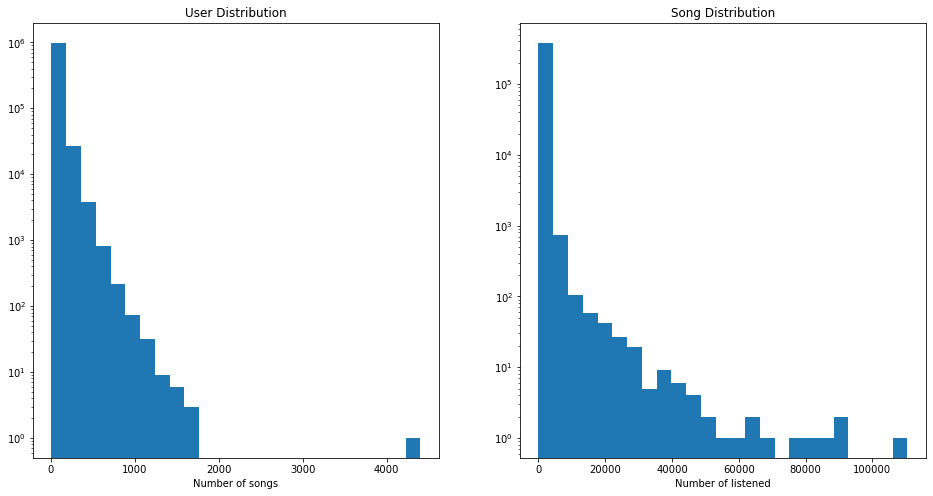

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title('User Distribution')
plt.xlabel('Number of songs')
plt.hist(list(user_dic.values()), bins=25, log=True)
plt.subplot(122)
plt.title('Song Distribution')
plt.xlabel('Number of listened')
plt.hist(list(song_dic.values()), bins=25, log=True)
plt.show()


### Create Graph

In [19]:
import networkx as nx

def get_edgelist():
    edge_list = []
    with open('data/train_triplets.txt', 'r') as f:
        count = 0
        line = f.readline()
        while line:
            line = line.strip()
            fields = line.split('\t')
            user, song, weight = fields[0], fields[1], int(fields[2])
            edge_list.append((user, song, weight))
            line = f.readline()
            count += 1
            if count > 100:
                break
    return edge_list

G = nx.Graph()
edge_list = get_edgelist()
for user, song, weight in edge_list:
    G.add_edge(user, song, weight=weight)

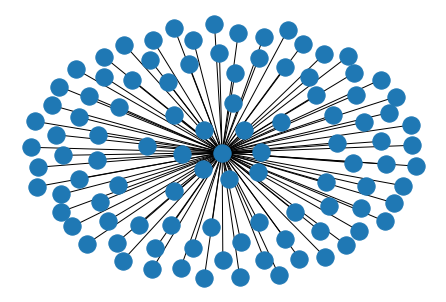

In [20]:
nx.draw(G)

In [5]:
edge_list

[('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOAKIMP12A8C130995', 1),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOAPDEY12A81C210A9', 1),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOBBMDR12A8C13253B', 2),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOBFNSP12AF72A0E22', 1),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOBFOVM12A58A7D494', 1),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOBNZDC12A6D4FC103', 1),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOBSUJE12A6D4F8CF5', 2),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOBVFZR12A6D4F8AE3', 1),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOBXALG12A8C13C108', 1),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOBXHDL12A81C204C0', 1),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOBYHAJ12A6701BF1D', 1),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOCNMUH12A6D4F6E6D', 1),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SODACBL12A8C13C273', 1),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SODDNQT12A6D4F5F7

In [16]:
G = nx.Graph()
G.add_edges_from([(1,2),(2,3)], weight=2)